# Skoda used car Analysis

<h3> By Priyanka Roy </h3>

<b> Objectives: </b>

   * Visualize the relation between various features of the dataset.
   * Explore & explain different plots used in this eda.
   * Data filtering
   * Data preprocessing
   * Data Aggregation/grouping
   * train data, test data
   * Performing Label Encoding or One-hot Encoding (Explaining which one is best suitable for the analysis)
   * Performing Machine Learning Algorithm- Linear Regression & Predicting the 'Price' from the test set
   * Evaluating RMSE - Root Mean Squared Error, MAE, MAPE, MSE, coefficient of determination values  from the actual target variable and the predicted target variable.
   * Comparing the actual and predicted target variable through visualization.


<b> Plots Used in the analysis: </b>

   * Barplot
   * Scatter plot
   * Regression line
   * Histogram
   * Distribution
   * ECDF (Empirical Cumulative Distribution Function)
   * Boxplot

<h4> Reference(s): </h4>   <br> 
[1] <a href="https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw"> Dataset Source </a> <br>

[2] <a href="https://github.com/priyan-2020/skoda_used_car_analysis/blob/main/skoda.csv"> Skoda .csv file </a>

<h4> Import required libraries and packages </h4>

In [2]:
# required library for data analysis & visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Reading the csv file </h4>

In [3]:
df = pd.read_csv("skoda.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


<h4> Displaying first 5 rows to get a clear conception of numerical and categorical columns of the dataset we found: </h4>

* model, year, transmission and fuelType are the categorical variables;

* price, mileage, mpg and engineSize are the numerical variables.

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

<h4> Create a function to count the unique values present in a column</h4>

In [5]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [6]:
model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fuelType_count = unique_val_count(df, 'fuelType')

In [7]:
# sorting the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')

<h4> Create a function named barplot</h4>

In [8]:
def barplot(data, column_x, color, rotation, yticks):
    
    # creating a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.9)
    
    # setting the title for the plot
    plt.title("Number of cars present for each " + column_x, fontsize= 14)
    
    # lebeling x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotation the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # setting up customized range for the yticks
    plt.yticks(yticks)


<h4>Creating final Barplot where each subplot denotes a column</h4>

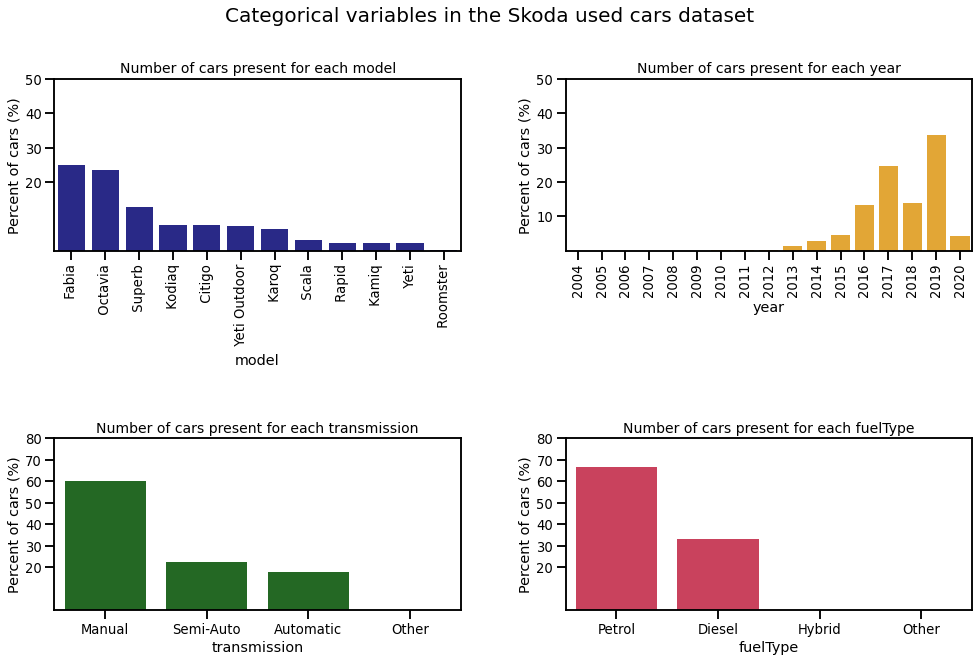

In [9]:
sns.set_context("talk", font_scale= 0.8)
plt.figure(figsize=(15,10))


# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'darkblue', 90, np.arange(20,51,10))


# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(10,51,10))


# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'darkgreen', 0, np.arange(20,81,10))


# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'crimson', 0, np.arange(20,81,10))


# keep the individual plots separate from each other
plt.tight_layout(pad=4)


# heading (super) title for all the plots
plt.suptitle('Categorical variables in the Skoda used cars dataset', fontsize=20, ha="center")
plt.subplots_adjust(top=0.88)


# display the plots
plt.show()

<h4> Remarks: </h4>

This barplot describes the percentage of car availale in the dataset for-

* Each model of Skoda car (<b>Fabia and Octabia in the leading position</b>),
* Released in each year (<b>2019 with the highest percentage</b>), 
* Each type of transmission (<b>Manual > Semi-Auto > Automatic > Others</b>) & 
* FuelType usage (<b>Petrol > Deisel > Hybrid</b>).



<h2>Creating scatterplot and trend line (regression) to visualize the relation between different numerical variables </h2>

* <b>engineSize vs miles per gallon (mpg) and </b> <br>

* <b>mileage vs price </b>

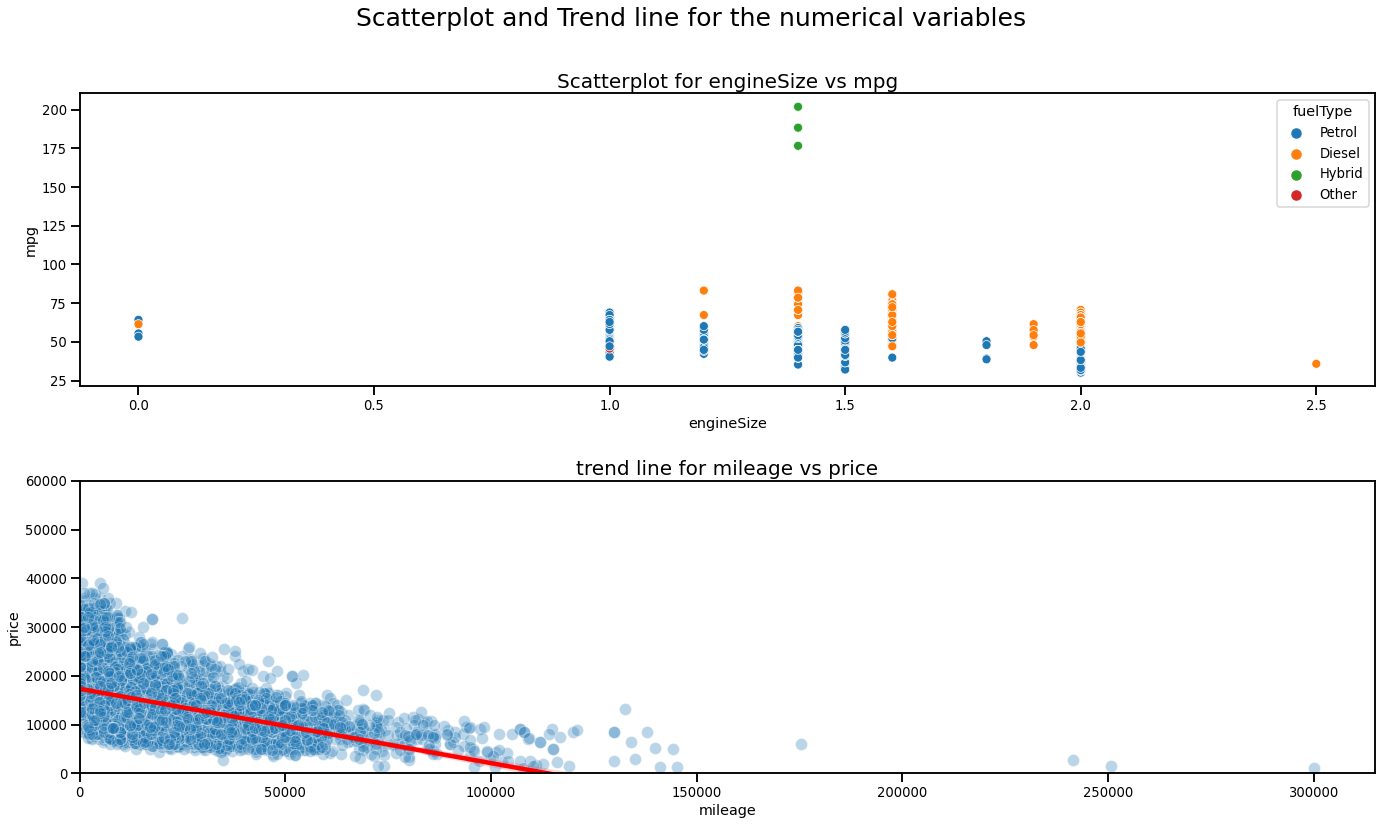

In [10]:
plt.figure(figsize=(20,12))


#engineSize vs mpg
plt.subplot(2,1,1)
sns.scatterplot(x='engineSize', y='mpg', data=df, hue= 'fuelType')
plt.title("Scatterplot for engineSize vs mpg", fontsize= 20)



#trend line for mileage vs price
plt.subplot(2,1,2)
sns.set_context("poster", font_scale = 0.5)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'red'}, scatter_kws={'edgecolor':'white', 'alpha': 0.3})
plt.ylim(0, 60000)
plt.xlim(0,)
plt.title("trend line for mileage vs price", fontsize= 20)



plt.tight_layout(pad= 3)

# Adding title for the plot
plt.suptitle("Scatterplot and Trend line for the numerical variables", fontsize= 25)
plt.subplots_adjust(top=0.88)

plt.show()

<h4>Remarks: </h4> <br>

* From the first plot (position 2,1,1) we can find that, for the same engine size the value of mpg (miles per gallon) flactuates for different type of fuels. Mpg value is higher for Diesel compared to that for Petrol and the highest is for Hybrid type of fuel. 

* While in the second plot (position 2,1,2) we see a trend line denoting an <b>inverse relationship</b> between mileage and price which somewhere hints the negative correlation in between them.

<h2>Creating Histogram and Distribution plot using Seaborn</h2>

In [11]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


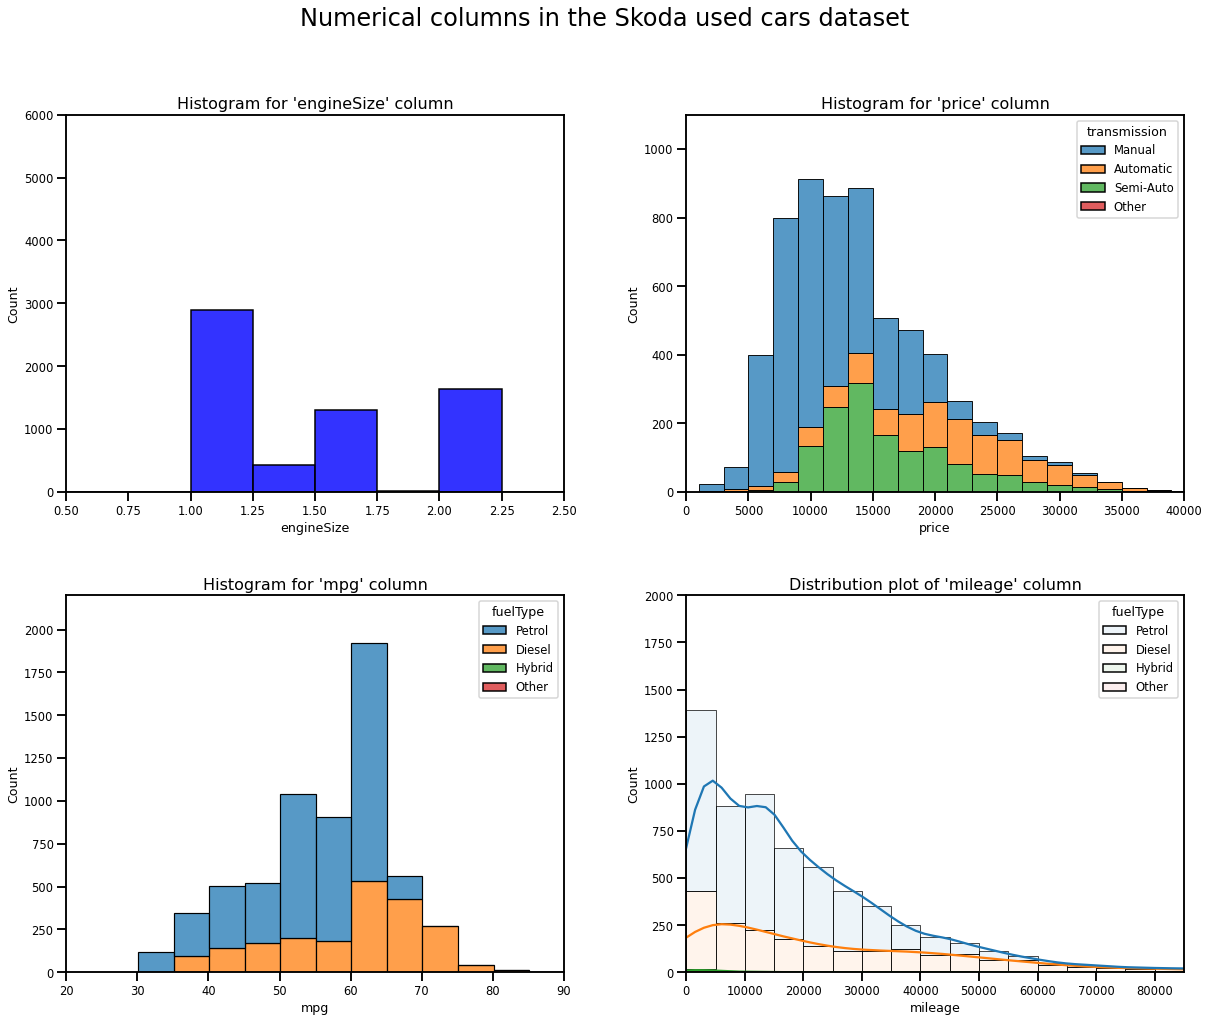

In [12]:
plt.figure(figsize=(18,15))
sns.set_context('talk', font_scale= 0.7)



# position (1,1)- engineSize

plt.subplot(2,2,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.25,  color= 'blue', alpha= 0.8)
plt.title("Histogram for 'engineSize' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0.5, 2.5)
plt.ylim(0, 6000)



# position (1,2)- price

plt.subplot(2,2,2)
sns.histplot(data=df, x='price', binwidth= 2000,  color= 'orange', hue= 'transmission', multiple="stack")
plt.title("Histogram for 'price' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0, 40000)
plt.ylim(0, 1100)



# position (2,1)- mpg

plt.subplot(2,2,3)
sns.histplot(data=df, x='mpg', binwidth= 5, hue= 'fuelType', multiple="stack")
plt.title("Histogram for 'mpg' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(20, 90)
plt.ylim(0, 2200)



# position (2,2)- mileage

plt.subplot(2,2,4)
sns.histplot(data=df, x='mileage', color= 'green', alpha= 0.08 , binwidth= 5000, kde= True, hue= 'fuelType', multiple="stack")
# To visualize the distribution lines only
# sns.displot(df, x="mileage", kind="kde", hue= 'fuelType')

plt.title("Distribution plot of 'mileage' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0, 85000)
plt.ylim(0, 2000)


# layout and Padding
plt.tight_layout(pad= 4)
plt.subplots_adjust(top=0.88)


#display()
plt.suptitle("Numerical columns in the Skoda used cars dataset", fontsize= '24', ha= 'center')
plt.show()

<h4>Remarks: </h4>

Here we see the histogram for the numerical columns of the dataset respectively where-

- In the first subplot (position 2,2,1) the <b>bimodal histogram </b> figure shows the total number of cars present for a particular range (0.25) of engine size. 


- And in the second subplot (position 2,2,2) the <b>unimodal histogram </b> represents the number of cars present for each type of <b>transmission</b> in each price range.


- In the third subplot (position 2,2,3) we can see an <b>unimodal histogram </b> for the mpg column where the highest count is available for the 60-65 range for fueltype petrol. But the higher rate of mpg can be found for Diesel. We clearly find that, the total count is higher for 'Petrol' but the rate of mpg is always higher for 'Diesel' which demonstrates cars having Diesel as their fuel type are more efficient & powerful with a higher rate of mile(s) per gallon (mpg).


- In the last subplot (position 2,2,4) we see a <b>right-skewed </b> distribution (also known as "positively skewed" distribution) that explains most data falls to the right, or positive side, of the graph's peak. Meaning, the count of cars is gradually decreasing with the higher value of mileage. Again, blue line denoting the count of cars for Petrol which is way higher than the orange line denoting that for Diesel. 


<br>

<h2>ECDF plot for numerical variables </h2>

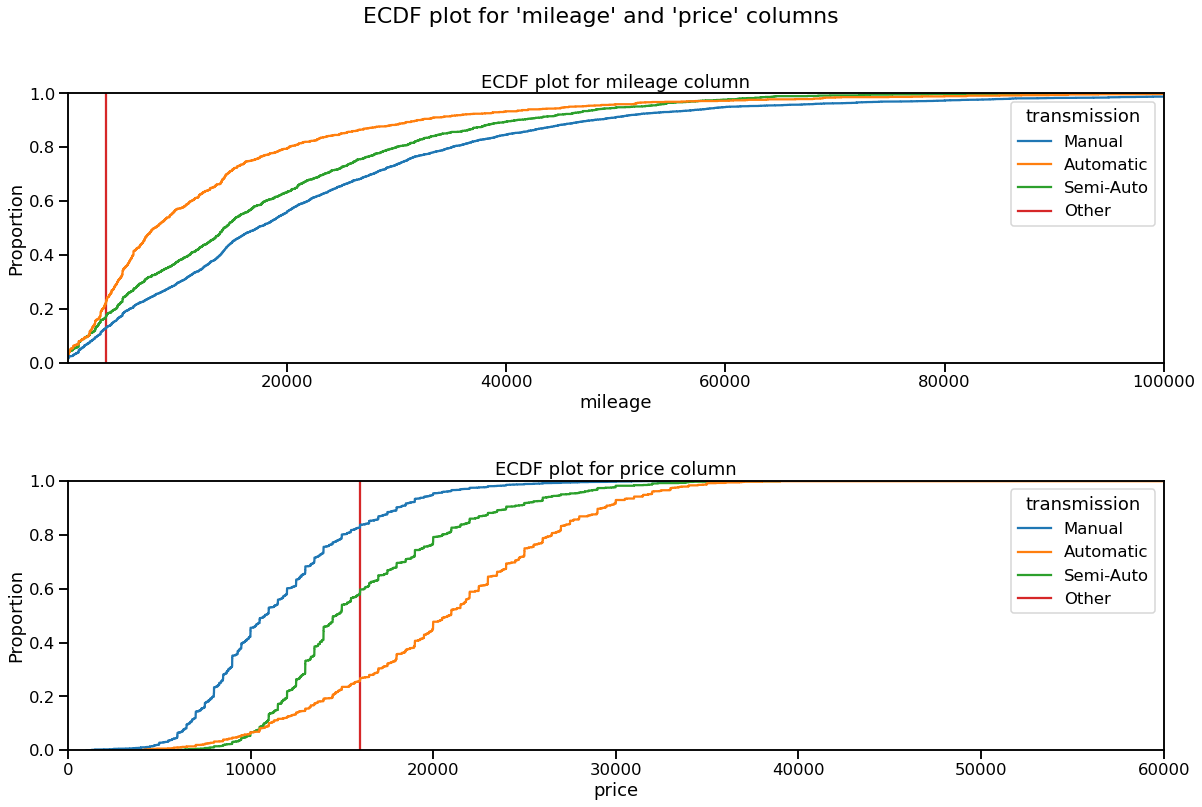

In [13]:
plt.figure(figsize=(18,12))
sns.set_context('talk')


plt.subplot(2,1,1)
#sns.histplot(data=df, x='mpg', binwidth= 0.5, cumulative=True , hue= 'fuelType', multiple='stack', stat= 'proportion')
sns.ecdfplot(data=df, x="mileage", stat= 'proportion' , hue='transmission' )
plt.xlim(20, 100000)
#plt.grid()
plt.title("ECDF plot for mileage column")


plt.subplot(2,1,2)
#sns.histplot(data=df, x='price', binwidth= 100, cumulative=True , hue= 'transmission', multiple="stack", stat="probability")
sns.ecdfplot(data=df, x="price", stat= 'proportion' , hue='transmission')
plt.xlim(0, 60000)
#plt.grid()
plt.title("ECDF plot for price column")


plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.88)

plt.suptitle("ECDF plot for 'mileage' and 'price' columns", fontsize= 22, ha= 'center')

plt.show()

<h4>Remarks: </h4>

* From this first <b> ECDF (Empirical Cumulative Distribution Function) </b> plot we can understand that, the probability of a <b>Manual </b> Skoda car having mileage <b> 40,000 </b> or less is approximately <b> 85% </b> where that probability for <b> Automatic </b> and <b> Semi-Auto </b> Skoda cars are somewhere above <b> 90% </b> and <b> Automatic </b> type is leading the rest two types. <br>


* From the second ECDF plot we find, more than 90% of the manual cars cost less than <b>20,000 </b> currency and the price somewhere lies in between <b>5,000-28,000 </b> for manual cars where the highest price for automatic cars is approximately <b> 38,000</b> currency approximately. <br>


* One more point to notice here is that, there isn't enough data enlisted in this dataset regarding the <b> 'Other' </b>type of Skoda cars and thus we didn't get any fruitful information for this type of transmission. <br> <br>




<h2> Creating Boxplot with seaborn </h2>

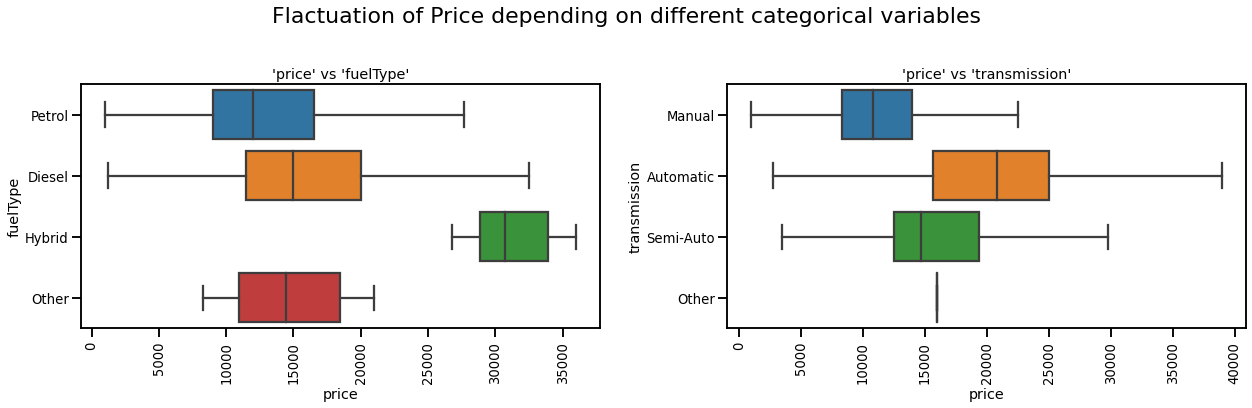

In [14]:
sns.set_context("talk", font_scale= 0.8)
plt.figure(figsize=(18,6))

#position (1,1)
plt.subplot(1,2,1)
sns.boxplot(x=df["price"], y=df["fuelType"], showfliers=False)
plt.xticks(rotation= 90)
plt.title("'price' vs 'fuelType'")


#position(1,2)
plt.subplot(1,2,2)
sns.boxplot(x=df["price"], y=df["transmission"], showfliers=False)
plt.xticks(rotation= 90)
plt.title("'price' vs 'transmission'")


plt.tight_layout(pad=2)
plt.subplots_adjust(top=0.8)


plt.suptitle("Flactuation of Price depending on different categorical variables", fontsize=22, ha='center')
plt.show()

<h4>Remarks:</h4>

* From the first boxplot ('price' vs 'fuelType') we see the average price for cars with <b>Hybrid fuel</b> type is over 30000 which is the highest among all. Besides, average price for <b>Petrol</b> type cars are much lower with value around 12000 and for <b>Diesel</b>- it's in the middle range (15000 approximately).


* Whereas, from the second boxplot ('price' vs 'transmission') we can see the average (mean) price for <b>Automatic </b> cars are leading with the value > 20000. And, average price for <b>Semi-auto & Manual</b> cars are respectively pointing approximately towards 15000 and 12000.

<h2>Trying To Find The Answer Of The Following Questions using 'groupby' and visualizing with Barplot</h2>


* A. What are the top 5 selling car models/transmission/fuelType in the dataset?  <br>


* B. What's the average selling price of the top 5 selling car models/transmission/fuelType? <br>


* C. What's the total sale of the top 5 selling car models/transmission/fuelType?  <br> <br>

In [15]:
# Creating a function to perform the aggregation using 'groupby' method

def agg(column_name):
    
    ds = df.groupby(column_name) ['price'].agg(['count','mean','sum'])
    
    # sorting the dataframe based on the column 'count'
    ds = ds.sort_values(by='count', ascending=False)

    # creating a new column named 'percent_of_cars'
    ds['percent_of_cars'] = ((ds['count']/ds['count'].sum())*100)

    # converting the 'sum' column in millions and rounding
    ds['sum'] = ds['sum']/1000000
    ds = ds.round(2)

    # removing the 'count' column
    ds = ds.drop('count', axis=1)
    return (ds)


In [16]:
display(agg('model').head())

,mean,sum,percent_of_cars
model,,,
Fabia,9906.50,15.56,25.07
Octavia,13991.96,20.67,23.57
Superb,18898.26,14.95,12.62
Kodiaq,25652.37,12.11,7.53
Citigo,6925.56,3.26,7.50


In [17]:
display(agg('fuelType').head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,13206.08,55.08,66.55
Diesel,16280.82,33.69,33.01
Hybrid,31225.94,0.56,0.29
Other,14957.78,0.13,0.14


In [18]:
display(agg('transmission').head())

,mean,sum,percent_of_cars
transmission,,,
Manual,11658.52,43.77,59.90
Semi-Auto,16285.11,22.93,22.47
Automatic,20609.33,22.75,17.62
Other,15999.00,0.02,0.02


<br>

<h4>Remarks: </h4>

* Here we've sorted the dataframe in <strong>descending</strong> order to get an overview of mean, sum and percentage values of selected columns that we'd aggregated earlier using <strong>'groupby'</strong> method and then applying <strong>aggregation fuction </strong>.

<br><br>

<h3>Creating a Function for the Barplots</h3>

In [19]:
def bar(column_name):
    
    # Setting style and figure size
    sns.set_context("talk")
    sns.set_style('darkgrid')
    plt.figure(figsize=(20,8))

    # For 1st row, 1st column where total no. of rows= 1 and total no. of columns = 3
    plt.subplot(1, 3, 1)
    sns.barplot(x='percent_of_cars', y=agg(column_name).index, data=agg(column_name), orient='h', color='orange')
    plt.title("Percentage of cars in each " + str(column_name))
    plt.xlabel("Percentage of cars (%)")
    plt.ylabel(column_name)


    # For 1st row, 2nd column where total no. of rows= 1 and total no. of columns = 3
    plt.subplot(1, 3, 2)
    sns.barplot(x='mean', y=agg(column_name).index, data=agg(column_name), orient='h', color='crimson')
    plt.title("Average resale value of the cars in each " + str(column_name))
    plt.xlabel("Average price ($)")
    plt.ylabel("")

    # For 1st row, 3rd column where total no. of rows= 1 and total no. of columns = 3
    plt.subplot(1, 3, 3)
    sns.barplot(x='sum', y=agg(column_name).index, data=agg(column_name), orient='h', color='green')
    plt.title("Total resale value of the cars by each " + str(column_name))
    plt.xlabel("Total price in million ($)")
    plt.ylabel("")


    # Displaying the barplots with a centered customed title
    title_name= "Barplots of the Skoda used car dataset for column : " + column_name
    plt.suptitle(title_name, fontsize= '28', ha= 'center')
    plt.tight_layout(pad=2)
    plt.show()


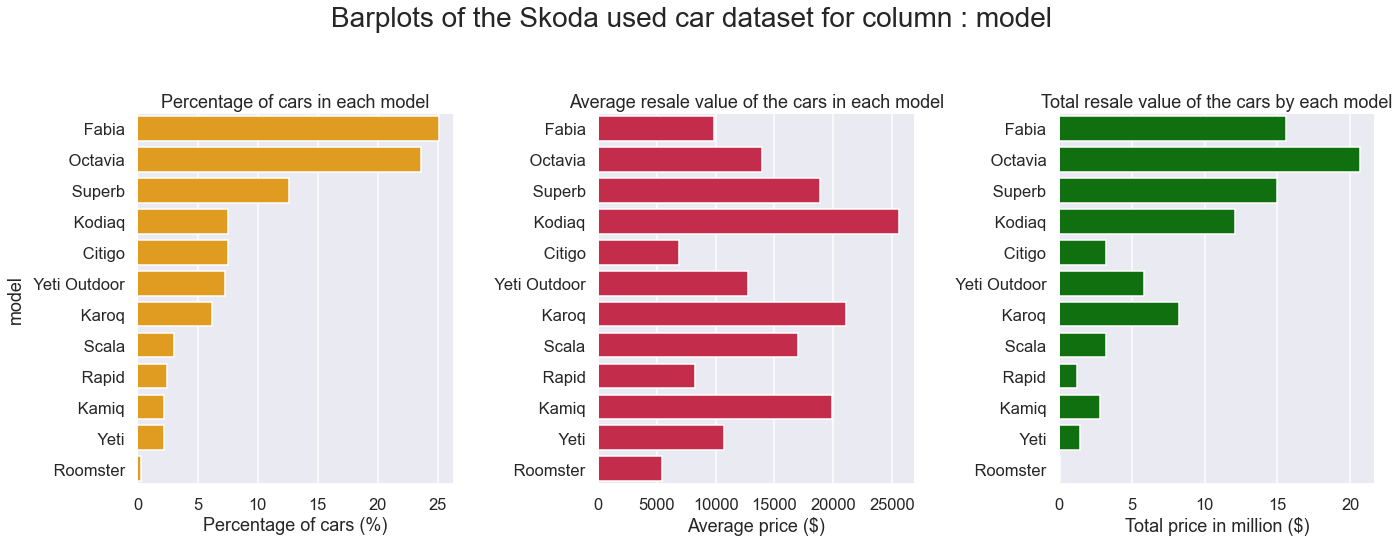

In [20]:
bar('model')

<h4>Remarks:</h4>

* Here we can see that, top 5 selling car models are-

   * <b>Fabia</b> (25.07%), <b>Octavia</b> (23.57%), <b>Superb</b> (12.62%), <b>Kodiaq</b> (7.53%) and <b>Citigo</b> (7.50%).
   
* Top 5 average selling price car models are-

   * <b>Kodiaq</b> (\\$ 25652.37), <b>Karoq</b> (\\$ 21067.55), <b>Kamiq</b> (\\$ 19904.29), <b>Superb</b> (\\$ 18898.26), <b>Scala</b> (\\$ 16988.61).
   
* Top 5 car models based on the Total resale value are-
   
   * <b>Octavia</b> (\\$ 20.67 M), <b>Fabia</b> (\\$ 15.56 M), <b>Superb</b> (\\$ 14.95 M), <b>Kodiaq</b> (\\$ 12.11 M), <b>Karoq</b> (\\$ 8.22 M).

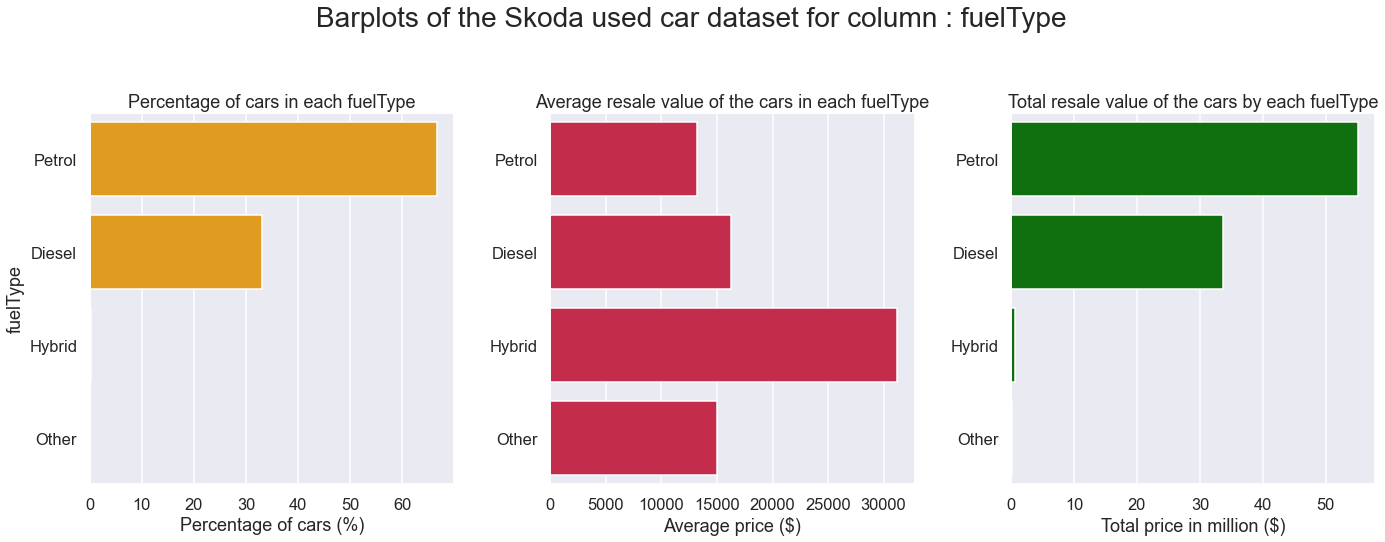

In [21]:
bar('fuelType')

<h4>Remarks:</h4>

* We found that, in this dataset, around <b>66.55%</b> of the Skoda cars are <b>Petrol</b> based and <b>33.01%</b> are <b>Diesel</b> based (where Hybrid type and others are negligible). <br><br>

* Average sales value of <b>Hybrid</b> (\\$ 31225.94) cars are much higher than <b>Deisel</b> (\\$ 16280.82), <b>Other Type</b> (\\$ 14957.78) and <b>Petrol</b> based cars have the least average sales value (\\$ 13206.08) among them. <br><br>

* Top total selling price by fuelType: 
   * <b>Petrol</b> based - \\$ 55.08 M
   
   * <b>Deisel</b> based - \\$ 33.69 M
   
   * <b>Hybrid</b>       - \\$ 0.56  M
   
   * <b>Other</b>        - \\$ 0.13  M 



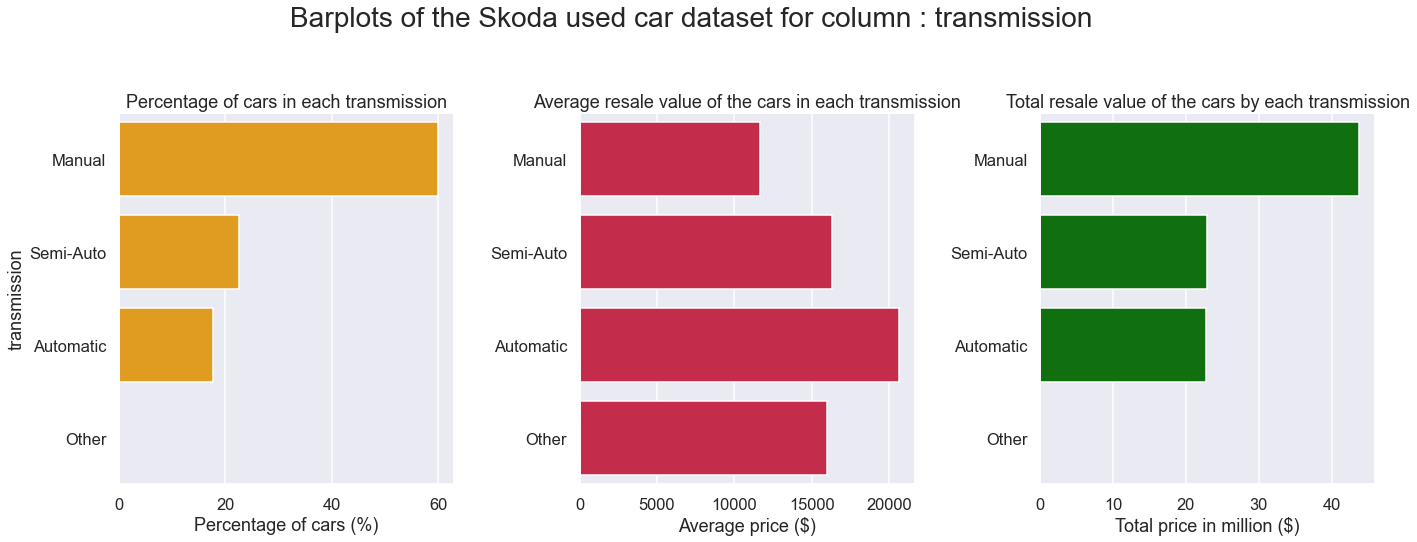

In [22]:
bar('transmission')

<h4>Remarks:</h4>

* From these above plots, we can see that, this dataset has enlisted around 60% of <b>Manual</b> Cars, 22.5% of <b>Semi-Auto</b> Cars and 17.5% of <b>Automatic</b> Cars where other type is negligible (0.02%).

* Regarding the average selling price we can see, <b>Automatic</b> Cars is leading with \\$ 20609.33 and <b>Semi-Auto, Other</b> and <b>Manual</b> have \\$ 16285.11, \\$ 15999.00 and \\$ 11658.52 respectively.

* Total selling price based on Transmission type:
   * <b>Manual</b>    - (\\$ 43.77 M), 
   * <b>Semi-Auto</b> - (\\$ 22.93 M),  
   * <b>Automatic</b> - (\\$ 22.75M),
   * <b>Other</b>     - (\\$ 0.02 M).
   

<h2>Import Required Libraries For Performing Machine Learning</h2>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


<h3>Separating the numeric features and target variable</h3>

In [24]:
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

X= df[features]
y= df[target]

print(X.shape, y.shape)

(6267, 4) (6267, 1)


<h3>Test, Train - Splitting Dataset</h3>

In [25]:
# splitting the dataset into test and train data where 80% data is used to train the model
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8, random_state= 53)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5013, 4) (1254, 4) (5013, 1) (1254, 1)


<h3>Performing Linear Regression</h3>

In [26]:
model = LinearRegression()
model= model.fit(X_train, y_train)

<h3>Prediction</h3>

In [27]:
y_pred= model.predict(X_test)
print(y_pred)

[[ 9583.87022478]
 [12330.05006803]
 [13740.48737477]
 ...
 [10242.991572  ]
 [ 6923.79498354]
 [12542.99257003]]


In [28]:
print(y_test)

      price
3655   7340
5902   9495
6056  12600
1299  16995
333   18222
...     ...
6262  11440
1775   6850
1409   9000
4865   7290
667   13898

[1254 rows x 1 columns]


<h3>Prediction Error</h3>

In [29]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

2995.7148673417114


<h4>Remarks: </h4>

* From the y_test price values which reflects the actual car price and y_pred price predictions we can see where actual price is 7340, 9495, 12600, ..... and so on our model predicted 9583.87, 12330, 13740, ...... dollars & vice-versa. 


* After evaluating the <b>Root Mean Square Error (RMSE)</b> we found that, there is an error in our model prediction which is around <b>2995.71</b> meaning this model predicted price with an <b>error of approximately 2996 dollars (+/-) in average</b>.


* Also by testing several times with different random state value we found that, 
     1. When random_state was <b>40</b>, RMSE value = <b>3587.88</b>
     
     2. When random_state was <b>50</b>, RMSE value = <b>3074.83</b>
     
     3. When random_state was <b>53</b>, RMSE value = <b>2995.71</b>
     
     4. When random_state was <b>58</b>, RMSE value = <b>3170.63</b>
     
     5.  When random_state was <b>60</b>, RMSE value = <b>3626.628</b>
     
  from which we came to a hypothesis that this model works better (the RMSE value is low) when the random state value somewhere lies in between the range <b>50-55</b>.

<h2>Choosing between One-hot and Label Encoding: </h2>


*  In this dataset the the categorical features are not ordinal and 
*  The number of categorical features is also less so one-hot encoding could be more effective than Label encoding. <br><b>Thus, we preferred One-hot Encoding over Label Encoding to apply on this dataset. </b>

In [30]:
# One-hot Encoding

df = pd.get_dummies(df, drop_first=True)
display(df.head())
print(df.shape)
# Separating features and target variable
target= ['price']

X= df.drop('price', axis=1)
y= df[target]

print("\n\nFeature Shape:", X.shape,  "\nTarget Shape:", y.shape)

,year,price,mileage,mpg,engineSize,model_ Fabia,model_ Kamiq,model_ Karoq,model_ Kodiaq,model_ Octavia,...,model_ Scala,model_ Superb,model_ Yeti,model_ Yeti Outdoor,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,10550,25250,54.3,1.4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2018,8200,1264,67.3,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2019,15650,6825,67.3,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2015,14000,28431,51.4,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019,18350,10912,40.9,1.5,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


(6267, 22)


Feature Shape: (6267, 21) 
Target Shape: (6267, 1)


<h3>Test, Train- Splitting Dataset: </h3>

In [31]:
# splitting the dataset into test and train data where 80% data is used to train the model
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8, random_state= 53)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5013, 21) (1254, 21) (5013, 1) (1254, 1)


<h3>Performing Linear Regression</h3>

In [32]:
model = LinearRegression()
model= model.fit(X_train, y_train)

<h3>Linear Regression Co-efficients and Intercept</h3>

In [33]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
15,transmission_Manual,-1671.143533
20,fuelType_Petrol,-1448.022855
19,fuelType_Other,-1367.171051
16,transmission_Other,-1076.342564
10,model_ Roomster,-415.312911
2,mpg,-183.150248
17,transmission_Semi-Auto,-182.912222
1,mileage,-0.060851
9,model_ Rapid,546.614162
4,model_ Fabia,637.940893


In [34]:
model.intercept_

array([-1782475.44145865])

<h3>Predicting Target Variable: y</h3>

In [35]:
y_pred= model.predict(X_test)
print(y_pred)

[[ 9035.66383989]
 [ 9400.02157089]
 [13450.39291476]
 ...
 [ 8924.46211399]
 [ 5348.47906185]
 [13765.4939673 ]]


<h3>Prediction Error: </h3>

In [36]:
# Mean Absolute Error

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", MAE)

# Mean Absolute Percentage Error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error : ", MAPE, "%")

# Mean Squared Error

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", MSE)

# Root Mean Squared Error

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error : ", RMSE)

# co-efficient of determination

r_squared = r2_score(y_test, y_pred) 
print("Coefficient of determination : ", r_squared)

Mean Absolute Error :  1285.3688808994696
Mean Absolute Percentage Error :  0.10909461322879863 %
Mean Squared Error :  3060727.347272904
Root Mean Squared Error :  1749.4934544812977
Coefficient of determination :  0.9185630411898443


<h3>Remarks:</h3>

* The Co-efficient of determination is ~<b> 0.9186</b> which indicates how efficiently this model is working.
* Again, we can see the value of MAPE is just <b>0.1</b> and we know the little the value, the better the model.

<h3>Actual Vs Predicted Target Variable: Comparing through Visualization</h3>

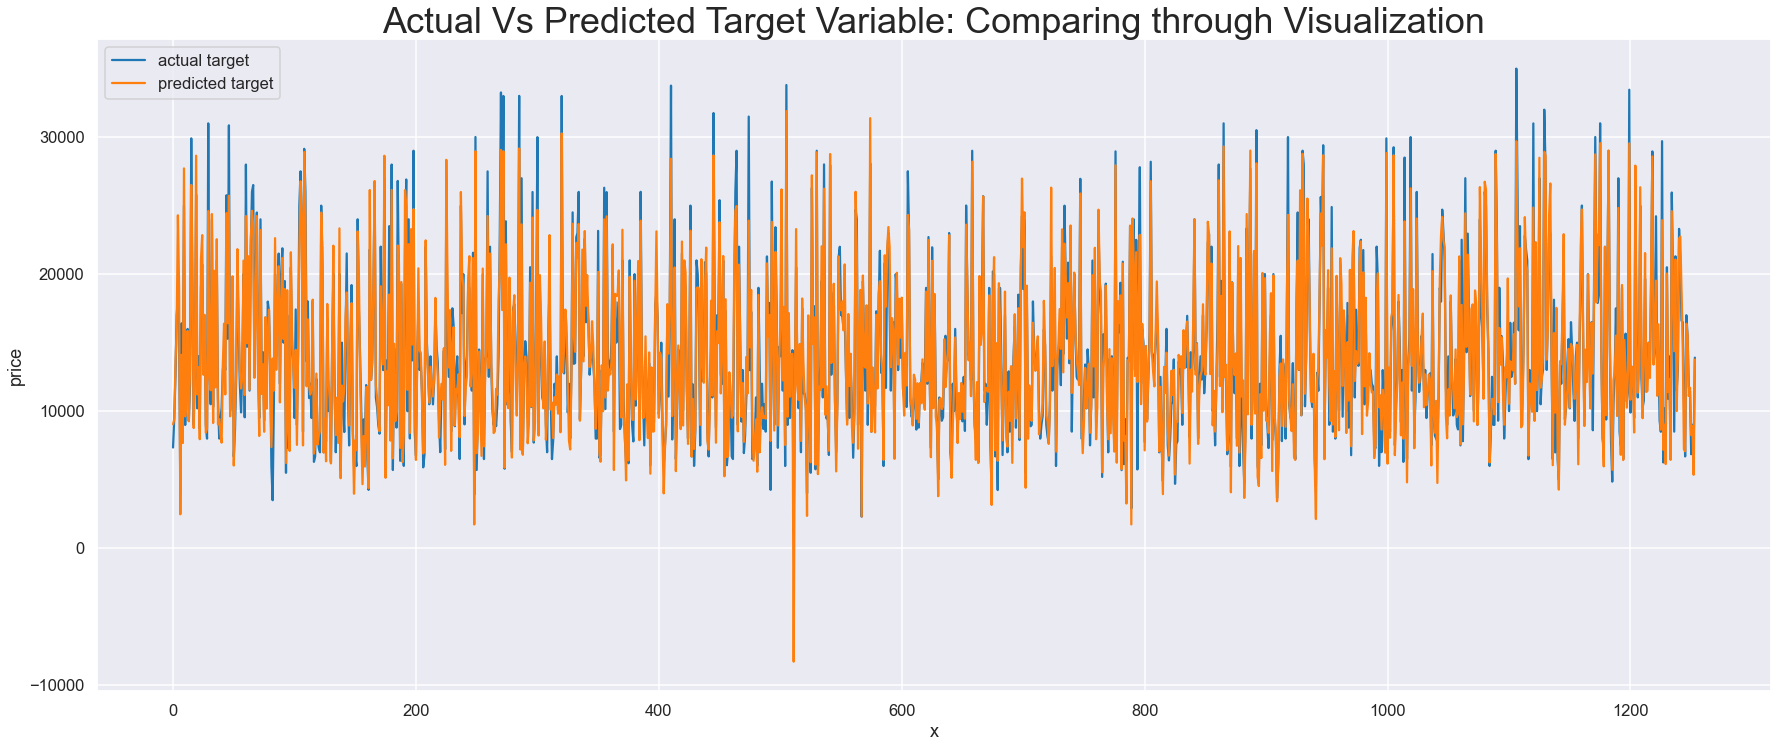

In [37]:
sns.set_context('talk')
plt.figure(figsize=(30,12))

y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

sns.lineplot(x= 'x', y= 'price', data=y_test, label= "actual target")
sns.lineplot(x= 'x', y= 'pred', data=y_test, label= "predicted target")

plt.title("Actual Vs Predicted Target Variable: Comparing through Visualization", fontsize= '36', ha= 'center')
plt.show()

<h3>Remarks:</h3>

* From the above visualization we found out that, the actual values and the predicted values are nearby but as the model accuracy is not 100% thus, the values are not the same to same.

* Although, we may apply many other ML Algorithms in this dataset but this Linear Regression Model is working pretty much efficient as we can recall the reason of this statement from previous explanations. But obviously, we can develop this model further to reduce the error % and increase the accuracy. Thanks!